In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import prep_plays
import wrangle_plays_data
pd.set_option('display.max_columns', None)

In [2]:
df = prep_plays.prep_plays_data()

In [3]:
df.shape

(17001, 30)

In [4]:
df.isnull().sum()

playDescription           0
quarter                   0
down                      0
yardsToGo                 0
team_by_comp_yds          0
defendersInTheBox         0
numberOfPassRushers       0
QB_under_pressure         0
gameClock                 0
absoluteYardlineNumber    0
epa                       0
pass_stopped              0
playResult                0
RB                        0
TE                        0
WR                        0
DL                        0
LB                        0
DB                        0
EMPTY                     0
I_FORM                    0
JUMBO                     0
PISTOL                    0
SHOTGUN                   0
SINGLEBACK                0
WILDCAT                   0
four_three                0
three_four                0
nickel                    0
dime                      0
dtype: int64

In [5]:
df.head()

,playDescription,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,gameClock,absoluteYardlineNumber,epa,pass_stopped,playResult,RB,TE,WR,DL,LB,DB,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime
0,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,3,7.0,4.0,0.0,15:00:00,90.0,0.261827,0,10,2,1,2,4,2,5,0,1,0,0,0,0,0,0,0,1,0
1,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,3,7.0,4.0,0.0,13:10:00,49.0,-0.372360,1,0,1,1,3,4,2,5,0,0,0,0,0,1,0,0,0,1,0
2,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,3,6.0,4.0,0.0,13:05:00,49.0,-0.702779,1,0,2,1,2,4,2,5,0,0,0,0,1,0,0,0,0,1,0
3,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,3,6.0,5.0,1.0,13:01:00,49.0,3.047530,0,33,1,1,3,4,1,6,0,0,0,0,1,0,0,0,0,0,1
4,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,3,8.0,6.0,0.0,10:59:00,11.0,-0.842272,1,0,2,3,0,6,3,2,0,0,0,0,1,0,0,0,0,0,0


In [6]:
df.pass_stopped.value_counts()

0    11054
1     5947
Name: pass_stopped, dtype: int64

In [7]:
df.columns

Index(['playDescription', 'quarter', 'down', 'yardsToGo', 'team_by_comp_yds',
       'defendersInTheBox', 'numberOfPassRushers', 'QB_under_pressure',
       'gameClock', 'absoluteYardlineNumber', 'epa', 'pass_stopped',
       'playResult', 'RB', 'TE', 'WR', 'DL', 'LB', 'DB', 'EMPTY', 'I_FORM',
       'JUMBO', 'PISTOL', 'SHOTGUN', 'SINGLEBACK', 'WILDCAT', 'four_three',
       'three_four', 'nickel', 'dime'],
      dtype='object')

In [8]:
pd.set_option('display.max_colwidth', -1)
df.playDescription.head()

0    (15:00) M.Ryan pass short right to J.Jones pushed ob at ATL 30 for 10 yards (M.Jenkins).
1    (13:10) M.Ryan pass incomplete short right to C.Ridley (J.Mills, J.Hicks).              
2    (13:05) (Shotgun) M.Ryan pass incomplete short left to D.Freeman.                       
3    (13:01) (Shotgun) M.Ryan pass deep left to J.Jones to PHI 6 for 33 yards (R.Darby).     
4    (10:59) (Shotgun) M.Ryan pass incomplete short right to D.Freeman.                      
Name: playDescription, dtype: object

In [9]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_plays_data.train_validate_test(df)

In [10]:
X_train.head()

,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,absoluteYardlineNumber,epa,playResult,RB,TE,WR,DL,LB,DB,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime
4170,2,2,4,2,6.0,4.0,0.0,46.0,-0.611122,0,1,1,3,2,4,5,0,0,0,0,1,0,0,0,0,1,0
14076,4,1,10,12,6.0,5.0,0.0,65.0,-0.032445,6,1,2,2,3,4,4,1,0,0,0,0,0,0,0,1,0,0
15897,3,2,3,23,8.0,7.0,0.0,103.0,1.789159,7,1,1,3,4,2,5,0,0,0,0,1,0,0,0,0,1,0
2723,3,1,10,16,7.0,4.0,0.0,43.0,-0.025190,8,1,2,2,4,3,4,0,0,0,0,0,1,0,1,0,0,0
632,4,1,9,32,6.0,4.0,0.0,101.0,-0.066855,1,1,1,3,2,4,5,0,0,0,0,1,0,0,0,0,1,0


In [11]:
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle_plays_data.min_max_scale(X_train, X_validate, X_test)

In [12]:
X_train_scaled

,quarter,down,yardsToGo,team_by_comp_yds,defendersInTheBox,numberOfPassRushers,QB_under_pressure,absoluteYardlineNumber,epa,playResult,RB,TE,WR,DL,LB,DB,EMPTY,I_FORM,JUMBO,PISTOL,SHOTGUN,SINGLEBACK,WILDCAT,four_three,three_four,nickel,dime
4170,0.25,0.333333,0.103448,0.032258,0.500,0.500,0.0,0.357143,0.520279,0.404908,0.25,0.25,0.6,0.333333,0.666667,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
14076,0.75,0.000000,0.310345,0.354839,0.500,0.625,0.0,0.551020,0.551760,0.441718,0.25,0.50,0.4,0.500000,0.666667,0.428571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15897,0.50,0.333333,0.068966,0.709677,0.750,0.875,0.0,0.938776,0.650855,0.447853,0.25,0.25,0.6,0.666667,0.333333,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2723,0.50,0.000000,0.310345,0.483871,0.625,0.500,0.0,0.326531,0.552154,0.453988,0.25,0.50,0.4,0.666667,0.500000,0.428571,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
632,0.75,0.000000,0.275862,1.000000,0.500,0.500,0.0,0.918367,0.549888,0.411043,0.25,0.25,0.6,0.333333,0.666667,0.571429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,0.25,0.000000,0.310345,0.096774,0.625,0.500,0.0,0.500000,0.690090,0.662577,0.25,0.25,0.6,0.666667,0.333333,0.571429,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
10063,0.25,0.333333,0.068966,0.935484,0.375,0.500,0.0,0.744898,0.585577,0.441718,0.25,0.25,0.6,0.333333,0.500000,0.714286,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10013,0.50,0.666667,0.241379,0.516129,0.500,0.500,0.0,0.897959,0.687523,0.472393,0.25,0.25,0.6,0.333333,0.500000,0.714286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3002,0.75,0.333333,0.068966,0.935484,0.625,0.500,0.0,0.153061,0.594821,0.453988,0.25,0.25,0.6,0.666667,0.333333,0.571429,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [15]:
X_train.QB_under_pressure.value_counts()

0.0    6443
1.0    697 
Name: QB_under_pressure, dtype: int64

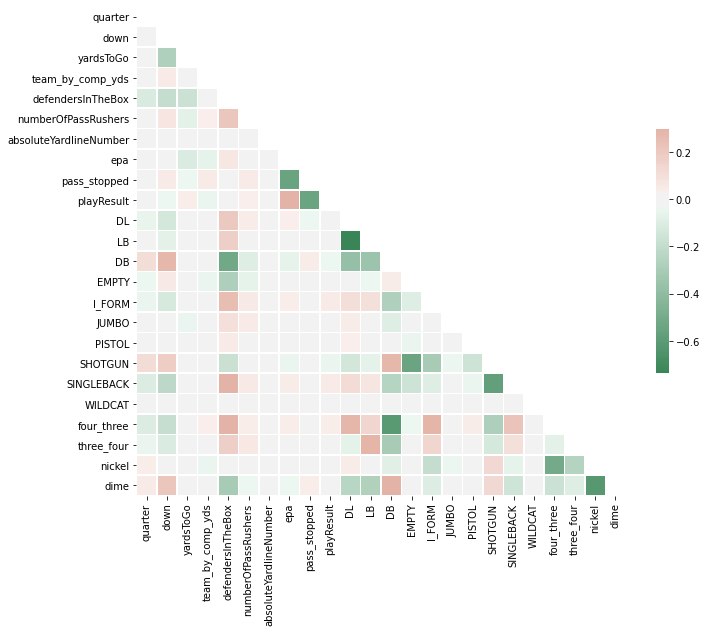

In [44]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [75]:
incompletion_rate = (((df.pass_stopped == 1).sum()) / (df.pass_stopped.count())).round(2)
incompletion_rate

0.35

Comparing Incompletion Rate to QB Under Pressure and 4-3 Defense


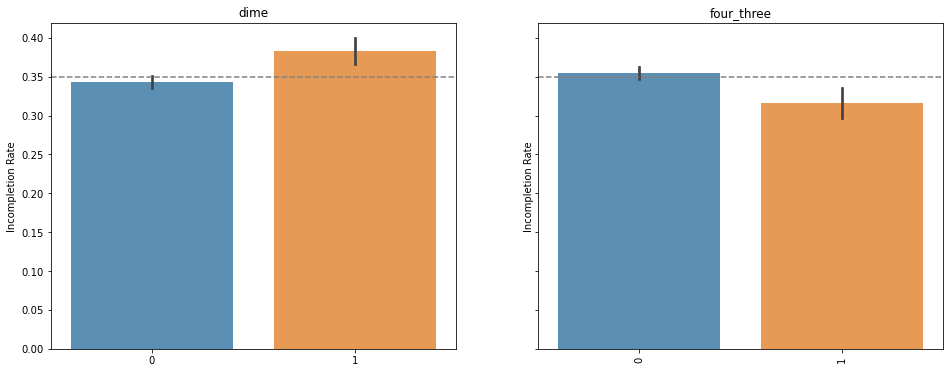

In [96]:
# Create features to visualize
features = ['dime', 'four_three']

# Subplot 2 graphs side by side on the first ron
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    # Bar chart for asd data
    sns.barplot(feature, 'pass_stopped', data=df, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Incompletion Rate')
    ax[i].set_title(feature)
    ax[i].axhline(incompletion_rate, ls='--', color='grey')
    plt.xticks(rotation = 90)
print('Comparing Incompletion Rate to QB Under Pressure and 4-3 Defense')

Comparing Incompletion Rate to QB Under Pressure and 4-3 Defense


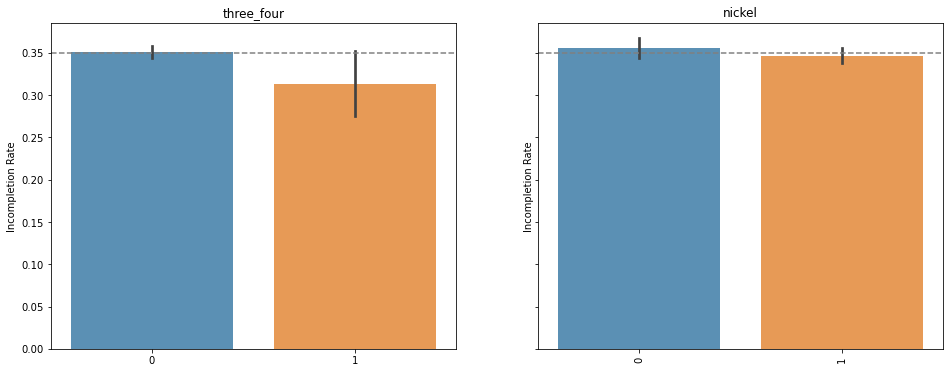

In [88]:
# Create features to visualize
features = ['three_four', 'nickel']

# Subplot 2 graphs side by side on the first ron
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    # Bar chart for asd data
    sns.barplot(feature, 'pass_stopped', data=df, ax=ax[i], alpha=.8)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Incompletion Rate')
    ax[i].set_title(feature)
    ax[i].axhline(incompletion_rate, ls='--', color='grey')
    plt.xticks(rotation = 90)
print('Comparing Incompletion Rate to QB Under Pressure and 4-3 Defense')

## Conclusion
- Dime and Nickel have a closer to 50/50 chance of stopping the pass over 3-4 and 4-3 defensive schemes based on the data

Text(0.5, 15.0, '')

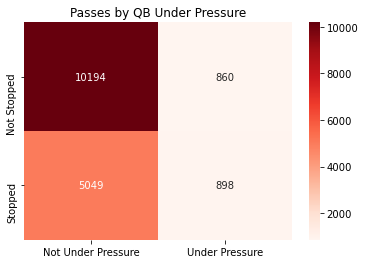

In [63]:
# Create crosstab of data I want to visualize
crosstab = pd.crosstab(df.pass_stopped, df.QB_under_pressure)
# Visualizes heatmap to see differences in values
sns.heatmap(crosstab, annot= True, cmap= 'Reds', fmt= 'd')

plt.title('Passes by QB Under Pressure')
locs, labels = plt.yticks()
plt.yticks(locs, ('Not Stopped', 'Stopped'))
plt.xticks(locs, ('Not Under Pressure', 'Under Pressure'))
plt.ylabel('')
plt.xlabel('')